# Reflect Tables into SQLAlchemy ORM

In [44]:
# Python SQL toolkit and Object Relational Mapper
# Import SQLAlchemy and other dependencies
# %matplotlib notebook
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

In [2]:
# *Use SQLAlchemy `create_engine` to connect to your sqlite database; allows to read SQLite file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Exploratory Climate Analysis

In [5]:
# *Use SQLAlchemy `automap_base()` to reflect your tables into classes; allows to view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# save a reference to those classes as `Measurement` and `Station`; (2 tables found in sqlite_db: 'measurement', 'station')
Measurement = Base.classes.measurement
Station = Base.classes.station

In [76]:
pd.read_sql("/Resources/hawaii.sqlite")

TypeError: read_sql() missing 1 required positional argument: 'con'

In [72]:
# Create our session (link) from Python to the DB (to start a session to query the db)
session = Session(engine)

In [8]:
# Use `engine.execute` to select and display the first 10 rows from the Measurement table
engine.execute("SELECT * FROM Measurement LIMIT 10").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [9]:
# Use `engine.execute` to select and display the first 10 rows from the Station table
engine.execute("SELECT * FROM Station LIMIT 10").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [42]:
# create today's date
dt.date.today()

datetime.date(2018, 9, 5)

In [43]:
# Calculate the date 1 year ago from today
dt.date.today() - dt.timedelta(days=365)

datetime.date(2017, 9, 5)

In [4]:
# ?*Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

In [10]:
# ??How I can see the column names in those 2 tables from sqlite db?

## Precipitation Analysis
* Design a query to retrieve the last 12 months of precipitation data.
* Select only the `date` and `prcp` values.
* Load the query results into a Pandas DataFrame and set the index to the date column.
* Sort the DataFrame values by `date`.
* Plot the results using the DataFrame `plot` method.
* Use Pandas to print the summary statistics for the precipitation data.

In [11]:
# last date of entry in the Measurement data table
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [12]:
# to get the last 12 months of data, last date - 365
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [13]:
# Design a query to retrieve the last 12 months of precipitation data, selecting only the `date` and `prcp` values.

rain_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>last_year).order_by(Measurement.date).all()

In [14]:
# Load the query results into a Pandas DataFrame 
rain_df1 = pd.DataFrame(rain_data)
rain_df1.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [15]:
# set the index to the date column.
rain_df2 = rain_df1.set_index("date")
rain_df2.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [16]:
# Sort the DataFrame values by `date`.
rain_df3 = rain_df2.sort_values("date", ascending=True)
rain_df3.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


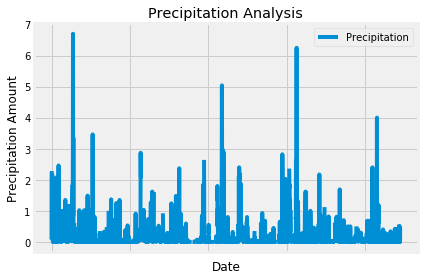

In [17]:
# ?(how to label x-axis)? Plot the results using the DataFrame `plot` method.
rain_df3.plot(x=None, y=None, kind='line', use_index=True)
plt.xlabel("Date")
plt.ylabel("Precipitation Amount")
plt.title("Precipitation Analysis")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Use Pandas to print the summary statistics for the precipitation data.
rain_df3.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [20]:
# How many stations are available in this dataset (in Measurement table)?
stationCount = session.query(Measurement).group_by(Measurement.station).count()
print("This dataset contains {} stations.".format(stationCount))

This dataset contains 9 stations.


In [29]:
# *Design a query to find the most active stations.* List the stations and observation counts in descending order.
# * Which station has the highest number of observations?* 
# find the station with the most temperature observations, then list them all in descending order
active_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()

most_active = active_station[0][0]    
print("The most active Station was",most_active,"with",active_station[0][1],"weather observations.")
print()
print("Here are all of the Stations (in descending order) with their number of observations:")
for station, count in active_station:
    print("Station",station,"had",count, "weather observations.")


The most active Station was USC00519281 with 2772 weather observations.

Here are all of the Stations (in descending order) with their number of observations:
Station USC00519281 had 2772 weather observations.
Station USC00519397 had 2724 weather observations.
Station USC00513117 had 2709 weather observations.
Station USC00519523 had 2669 weather observations.
Station USC00516128 had 2612 weather observations.
Station USC00514830 had 2202 weather observations.
Station USC00511918 had 1979 weather observations.
Station USC00517948 had 1372 weather observations.
Station USC00518838 had 511 weather observations.


In [22]:
# * Design a query to retrieve the last 12 months of temperature observation data (tobs).
#  * Filter by the station with the highest number of observations.
temperature_data = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == busiest).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

In [23]:
#Create dataFrame for temperature data
temperature_df=pd.DataFrame(temperature_data)
temperature_df.head()

,station,date,tobs
0,USC00519281,2016-08-24,77.0
1,USC00519281,2016-08-25,80.0
2,USC00519281,2016-08-26,80.0
3,USC00519281,2016-08-27,75.0
4,USC00519281,2016-08-28,73.0


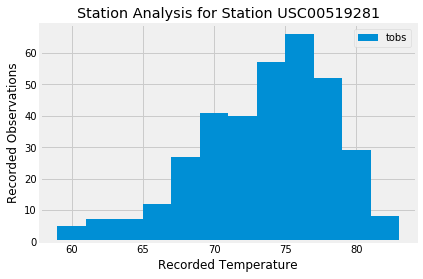

In [28]:
# * Plot the results as a histogram with `bins=12`.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(temperature_df['tobs'],12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Recorded Observations")
plt.legend(['tobs'])
plt.title("Station Analysis for Station " + busiest)
plt.show()

In [45]:
#Use Inspector to get the column name
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

### Temperature Analysis (Optional)_didn't perform since optional

### Other Recommended Analysis (Optional)_didn't perform since optional

### Step 2 - Climate App


In [67]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
import pandas as pd
import numpy as np
import datetime as dt

In [68]:
from flask import Flask, render_template, redirect, jsonify
#? from werkzeug.wrappers import Request, Response

In [69]:
# *Use SQLAlchemy `create_engine` to connect to your sqlite database; allows to read SQLite file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [64]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [65]:
# save a reference to those classes as `Measurement` and `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [66]:
# Create our session (link) from Python to the DB (to start a session to query the db)
session = Session(engine)

### Routes

In [61]:
# create app
app = Flask(__name__)

@app.route("/")
    def home():
        return(
            f"Welcome to the Hawaii Climate Analysis API! \n"
            f"Available routes: \n"
            f"/api/v1.0/precipitation \n"
            f"/api/v1.0/stations \n"
            f"/api/v1.0/tobs \n"
            f"/api/v1.0/temp/start/end \n"
        )
    
@app.route("/api/v1.0/precipitation")
    def precipitation():
        last_year = dt.date(2018, 9, 5) - dt.timedelta(days=365)
        Precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>last_year).all() #order_by(Measurement.date)
        precip = {}
        for row in precipitation:
            precip[row[0]] = row[1]
        return jsonify(precip)
    
@app.route("/api/v1.0/stations")
def stations():
    results = session.query(Station.station).all()
    stations = list(np.ravel(results))
    return jsonify(stations)

@app.route("/api/v1.0/tobs")
def tobs():
    last_year = dt.date(2018, 9, 5) - dt.timedelta(days=365)
    tobs = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date >= prev_year).all()
    temps = list(np.ravel(tobs))
    return jsonify(temps)

@app.route(/api/v1.0/temp/<start>)
@app.route(/api/v1.0/temp/<start>/<end>)
def starts(start=None, end=None):
    selection = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    
    if not end:
        # TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date
        results = session.query(*selection).filter(Measurement.date >= start).all()
        temps = list(np.ravel(results))
        return jsonify(temps)
    
    # calculate TMIN`, `TAVG`, and `TMAX' for dates in between start and end
    results = session.query(*selection).filter(Measurement.date <= end).all()
    return jsonify(temps)


if __name__ == '__main__':
    app.run(debug=True)






SyntaxError: invalid syntax (<ipython-input-61-5d3ef33479c2>, line 4)

In [50]:
from werkzeug.serving import run_simple
run_simple('localhost', 5000, app)

NameError: name 'app' is not defined